# New Zealand RaspberryShake Earthquake Waveform Collection

## Objective
In this notebook, we will collect earthquake waveform data from **RaspberryShake stations** in New Zealand over the past 5 years.  
First, we will check which stations have the three required traces: EHZ, ENN, and ENE.  

---



In [2]:
!pip install obspy seisbench 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Initialize FDSN Client

In [4]:
from obspy.clients.fdsn import Client
# Initialize FDSN client for Raspberry Shake
client = Client("RASPISHAKE")

### List of RaspberryShake Stations In New Zealand

In [5]:
station_codes = [
    "R8ECE", "R43FF", "R4805", "RF67F", "R71D0", "RAE9D", "R04D8", "R9C56", "R7734",
    "R5F5E", "R8FD3", "RF095", "S0C15", "R6F88", "RF862", "R81A1", "R4908", "R0A01",
    "R5C37", "R9288", "RE158", "S1A73", "R4288", "R3D73", "RACC4", "RBEA7", "R13B6",
    "SD569", "RA92F", "R022A", "RD719", "RCF9D", "RD9AE", "RFD82", "R4502", "RD940",
    "R9FFA", "R3C22", "R6AEA", "R0122", "R83DA", "R59BB", "R6C1E", "R7258", "R9229",
    "R09DE", "RE12C", "RB669", "R2DDD", "RAEE3", "R3AFA", "R3967", "R00B9", "R8A0C",
    "RC144", "R8EEE", "R4D20", "RCD60", "RE583", "RB59E", "RE4C9", "RCDC4", "RA3CF",
    "RF29B", "R9A1F", "R9ABA", "R8F7A"
]


### Network and Required Channels

In [6]:
# Raspberry Shake network
network_code = "AM"

# Required channels
required_channels = {"EHZ", "ENN", "ENE"}

# Store filtered stations
filtered_stations = []


### Check Available Channels for Each Station

In [7]:
for station in station_codes:
    try:
        inventory = client.get_stations(network=network_code, station=station, level="channel")
        available_channels = set()

        for network in inventory:
            for station_obj in network:
                for channel in station_obj:
                    available_channels.add(channel.code)

        if required_channels.issubset(available_channels):
            filtered_stations.append(station)
            print(f"✅ {station} has {required_channels}")
        else:
            print(f"❌ {station} missing channels: {required_channels - available_channels}")

    except Exception as e:
        print(f"Error fetching {station}: {e}")

print("\n **Filtered Station List:**")
print(filtered_stations)


❌ R8ECE missing channels: {'ENN', 'ENE'}
✅ R43FF has {'EHZ', 'ENN', 'ENE'}
❌ R4805 missing channels: {'ENN', 'ENE'}
✅ RF67F has {'EHZ', 'ENN', 'ENE'}
✅ R71D0 has {'EHZ', 'ENN', 'ENE'}
✅ RAE9D has {'EHZ', 'ENN', 'ENE'}
✅ R04D8 has {'EHZ', 'ENN', 'ENE'}
✅ R9C56 has {'EHZ', 'ENN', 'ENE'}
✅ R7734 has {'EHZ', 'ENN', 'ENE'}
✅ R5F5E has {'EHZ', 'ENN', 'ENE'}
✅ R8FD3 has {'EHZ', 'ENN', 'ENE'}
❌ RF095 missing channels: {'ENN', 'ENE'}
❌ S0C15 missing channels: {'EHZ', 'ENN', 'ENE'}
✅ R6F88 has {'EHZ', 'ENN', 'ENE'}
❌ RF862 missing channels: {'ENN', 'ENE'}
❌ R81A1 missing channels: {'ENN', 'ENE'}
✅ R4908 has {'EHZ', 'ENN', 'ENE'}
❌ R0A01 missing channels: {'ENN', 'ENE'}
✅ R5C37 has {'EHZ', 'ENN', 'ENE'}
✅ R9288 has {'EHZ', 'ENN', 'ENE'}
✅ RE158 has {'EHZ', 'ENN', 'ENE'}
✅ S1A73 has {'EHZ', 'ENN', 'ENE'}
✅ R4288 has {'EHZ', 'ENN', 'ENE'}
✅ R3D73 has {'EHZ', 'ENN', 'ENE'}
✅ RACC4 has {'EHZ', 'ENN', 'ENE'}
✅ RBEA7 has {'EHZ', 'ENN', 'ENE'}
✅ R13B6 has {'EHZ', 'ENN', 'ENE'}
✅ SD569 has {'EHZ', 'ENN',

# List Parameters of RaspberryShake Stations with 3 Traces

## Objective
In this section, we will list out the **parameters** (latitude, longitude, and available channels) of RaspberryShake stations that have the three required traces: **EHZ, ENN, ENE**.  
The results will be saved into a CSV file for further analysis.  

In [11]:
import csv
from obspy.clients.fdsn import Client

### Filtered Stations List

In [12]:
# List of Raspberry Shake stations that have EHZ, ENN, ENE
filtered_stations = [
    'R43FF', 'RF67F', 'R71D0', 'RAE9D', 'R04D8', 'R9C56', 'R7734', 'R5F5E',
    'R8FD3', 'R6F88', 'R4908', 'R5C37', 'R9288', 'RE158', 'S1A73', 'R4288',
    'R3D73', 'RACC4', 'RBEA7', 'R13B6', 'SD569', 'R022A', 'RD719', 'RCF9D',
    'RD9AE', 'RFD82', 'RD940', 'R9FFA', 'R3C22', 'R6AEA', 'R0122', 'R83DA',
    'R59BB', 'R6C1E', 'R7258', 'R9229', 'R09DE', 'RE12C', 'R3AFA', 'R8A0C',
    'R4D20', 'RE583', 'RF29B', 'R9ABA'
]

# Raspberry Shake network
network_code = "AM"

# CSV file path
csv_filename = "filtered_stations_with_channels.csv"


### Fetch Station Parameters and Save to CSV

In [13]:
# Open CSV file for writing
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Station", "Latitude", "Longitude", "Channels"])  # Header

    for station in filtered_stations:
        try:
            inventory = client.get_stations(network=network_code, station=station, level="channel")
            
            lat, lon = None, None
            channels = []

            for network in inventory:
                for station_obj in network:
                    lat = station_obj.latitude
                    lon = station_obj.longitude
                    for channel in station_obj:
                        if channel.code in ["EHZ", "ENN", "ENE"]:  # Filter specific channels
                            channels.append(channel.code)

            channels_str = ", ".join(set(channels))  # Remove duplicates and format as a string
            
            if lat is not None and lon is not None:
                writer.writerow([station, lat, lon, channels_str])
                print(f"✅ {station} → Lat: {lat}, Lon: {lon}, Channels: {channels_str}")

        except Exception as e:
            print(f"❌ Could not fetch data for {station}: {e}")

print(f"\n **CSV File Saved:** {csv_filename}")


✅ R43FF → Lat: -38.909909909909906, Lon: 175.74489493268052, Channels: EHZ, ENE, ENN
✅ RF67F → Lat: -40.86486486486486, Lon: 175.05637953881535, Channels: EHZ, ENE, ENN
✅ R71D0 → Lat: -40.747747747747745, Lon: 175.1216599014663, Channels: EHZ, ENE, ENN
✅ RAE9D → Lat: -41.171171171171174, Lon: 174.81361826283353, Channels: EHZ, ENE, ENN
✅ R04D8 → Lat: -41.306306306306304, Lon: 174.8157944684386, Channels: EHZ, ENE, ENN
✅ R9C56 → Lat: -41.11711711711712, Lon: 174.8719385320915, Channels: EHZ, ENE, ENN
✅ R7734 → Lat: -41.22522522522522, Lon: 174.90627506793854, Channels: EHZ, ENE, ENN
✅ R5F5E → Lat: -41.14414414414414, Lon: 175.01278538786212, Channels: EHZ, ENE, ENN
✅ R8FD3 → Lat: -41.2972972972973, Lon: 174.77545657888442, Channels: EHZ, ENE, ENN
✅ R6F88 → Lat: -40.93693693693694, Lon: 174.96721329323893, Channels: EHZ, ENE, ENN
✅ R4908 → Lat: -41.52252252252252, Lon: 173.73838009376078, Channels: EHZ, ENE, ENN
✅ R5C37 → Lat: -41.2972972972973, Lon: 174.76400028570842, Channels: EHZ, EN

# Test Available Stations for a Specific Earthquake Event

## Objective
Now we will test the **available stations** for a specific earthquake event.  
The goal is to see which stations have all three required channels: **EHZ, ENE, and ENN**.  

---

In [16]:
#sample code to know how many station has a certain waveform 
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

# Initialize the FDSN client
client = Client('RASPISHAKE')

# Define the event time
event_time = UTCDateTime(2022, 11, 9, 16, 58, 27)

# List of stations from the CSV file
stations = [
    "R43FF", "RF67F", "R71D0", "RAE9D", "R04D8", "R9C56", "R7734", "R5F5E", "R8FD3", "R6F88",
    "R4908", "R5C37", "R9288", "RE158", "S1A73", "R4288", "R3D73", "RACC4", "RBEA7", "R13B6",
    "SD569", "R022A", "RD719", "RCF9D", "RD9AE", "RFD82", "RD940", "R9FFA", "R3C22", "R6AEA",
    "R0122", "R83DA", "R59BB", "R6C1E", "R7258", "R9229", "R09DE", "RE12C", "R3AFA", "R8A0C",
    "R4D20", "RE583", "RF29B", "R9ABA"
]

# Function to check if all required channels are available
def check_channels(station):
    try:
        # Fetch waveforms for EHZ, ENE, ENN channels
        stream = client.get_waveforms(
            network="AM",
            station=station,
            location="*",
            channel="E??",  # Matches EHZ, ENE, ENN
            starttime=event_time - 60,
            endtime=event_time + 120
        )
        
        # Extract available channels
        available_channels = {tr.stats.channel for tr in stream}
        
        # Check if all required channels are present
        required_channels = {"EHZ", "ENE", "ENN"}
        if required_channels.issubset(available_channels):
            return True
        else:
            return False
    except Exception as e:
        # If an error occurs (e.g., no data), return False
        return False

# Iterate through stations and check availability
available_stations = []
for station in stations:
    if check_channels(station):
        available_stations.append(station)

# Print the stations with all required channels
print("Stations with EHZ, ENE, and ENN channels available:")
print(available_stations)

Stations with EHZ, ENE, and ENN channels available:
['R83DA']


# Load Filtered Station Data from CSV

## Objective
In this step, we will **load the CSV file** containing the filtered stations with the three required channels (EHZ, ENE, ENN) and check its structure.  

---

In [17]:
import pandas as pd

csv_file = "/kaggle/working/filtered_stations_with_channels.csv"
data = pd.read_csv(csv_file)


print("CSV Columns:", data.columns)


CSV Columns: Index(['Station', 'Latitude', 'Longitude', 'Channels'], dtype='object')


# Check RaspberryShake FDSN Waveform Server

## Objective
In this step, we will **fetch and plot waveform data** from a RaspberryShake station for a specific time window.  
This helps verify that the **FDSN server is accessible** and that the data is available.  

---


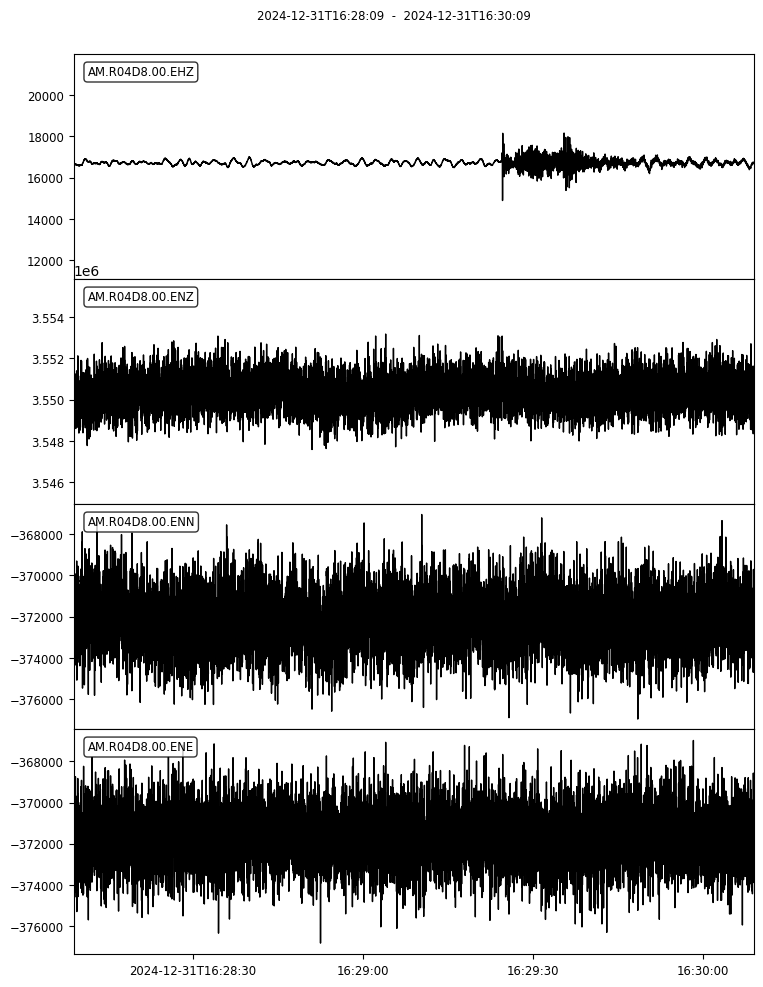

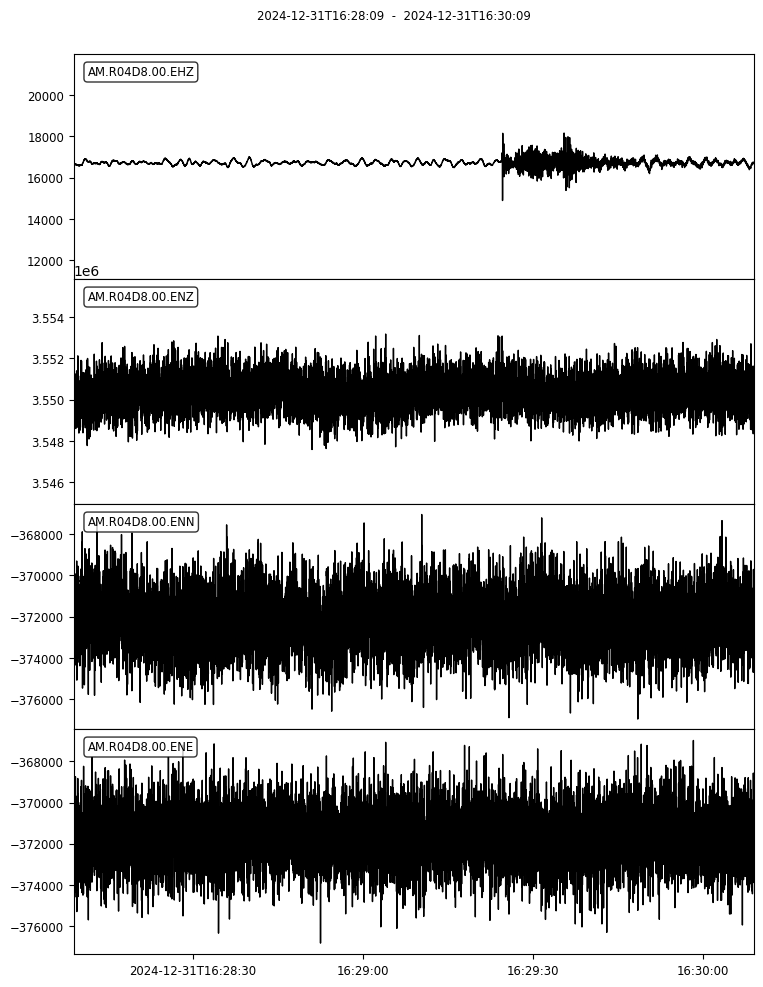

In [19]:
#checking the fdsn raspishake waveform server
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
start_1 = "2024-12-31 16:29:09"
starttime = UTCDateTime(start_1)-60
endtime = starttime + 120      
client = Client('RASPISHAKE')
waveform = client.get_waveforms('AM', 'R04D8', '00', 'E??', starttime, endtime)
waveform.plot()

# Print Station Details Using Inventory

## Objective
In this step, we will **retrieve and print metadata** for a specific RaspberryShake station using the FDSN inventory.  
This includes station information such as latitude, longitude, elevation, and network details.  

---

In [ ]:
#prints the station details using inventory 
from obspy.clients.fdsn import Client
client = Client("RASPISHAKE")

station_code = "RF67F"  
network = "AM"

try:
    inventory = client.get_stations(network=network, station=station_code, level="station")
    print(inventory)
except Exception as e:
    print(f" Error fetching station {station_code}: {e}")


# Load New Zealand Earthquake Data (2020-2025)

## Objective
In this step, we will **load earthquake event data for New Zealand from 2020 to 2025**.  
The dataset was collected from **GeoNet QuakeSearch**: [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/?utm_source=chatgpt.com)  

---


In [ ]:
import pandas as pd

csv_path = "/kaggle/input/earthquake/earthquakes(new-2020-2025).csv"
df = pd.read_csv(csv_path)

# Print only the column names
print(df.columns.tolist())


# Filter Earthquake Data Columns


From the New Zealand earthquake dataset (2020-2025), we will **keep only the relevant columns** needed for analysis and waveform downloads.  
The selected columns are:  
- `publicid` → Unique ID for the event  
- `origintime` → Event origin time  
- `longitude` & `latitude` → Event location  
- `magnitude` → Event magnitude  
- `depth` → Event depth  

---

In [ ]:
import pandas as pd

# Load original CSV
csv_path = "/kaggle/input/earthquake/earthquakes(new-2020-2025).csv"
df = pd.read_csv(csv_path)

# Keep only the required columns
columns_to_keep = ['publicid', 'origintime', 'longitude', 'latitude', 'magnitude', 'depth']
filtered_df = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV
filtered_csv_path = "/kaggle/working/earthquakes(new-2020-2025).csv"
filtered_df.to_csv(filtered_csv_path, index=False)

print(f"✅ Filtered CSV saved to {filtered_csv_path}")


# Match Earthquakes with Nearby Stations

## Objective
In this step, we will **match New Zealand earthquake events (2020-2025) with RaspberryShake stations** based on:

- Event magnitude  
- Distance between earthquake epicenter and station  

**Criteria:**

- Magnitude 2.7–5.5 → station within 100 km  
- Magnitude >5.5 → station within 150 km  

We will also calculate **epicentral distance in degrees** for each pair and save the matched records to a CSV file.

---


In [ ]:
import pandas as pd
from geopy.distance import geodesic
from obspy.geodetics import locations2degrees

# Load files
eq_df = pd.read_csv("/kaggle/input/earthquake/earthquakes(new-2020-2025).csv")
station_df = pd.read_csv("/kaggle/working/filtered_stations_with_channels.csv")

# Rename columns for clarity
eq_df = eq_df.rename(columns={
    'publicid': 'event_id',
    'origintime': 'event_time',
    'longitude': 'event_longitude',
    'latitude': 'event_latitude',
    'magnitude': 'magnitude',
    'depth': 'depth_km'
})

station_df = station_df.rename(columns={
    'Station': 'station_code',
    'Latitude': 'station_latitude',
    'Longitude': 'station_longitude',
    'Channels': 'channels'
})

# Output records
filtered_records = []

print(f"🔍 Total earthquakes: {len(eq_df)}, Total stations: {len(station_df)}")

# Loop through each earthquake
for i, (_, eq) in enumerate(eq_df.iterrows(), 1):
    print(f"\n🌍 Processing Earthquake {i}/{len(eq_df)} → ID: {eq['event_id']}, Mag: {eq['magnitude']}")
    
    matches = 0  # Count how many stations matched this earthquake
    for _, st in station_df.iterrows():
        # Get event and station coordinates
        ev_loc = (eq['event_latitude'], eq['event_longitude'])
        st_loc = (st['station_latitude'], st['station_longitude'])

        # Calculate distance in km
        distance_km = geodesic(ev_loc, st_loc).km

        # Check magnitude & distance condition
        if (2.7 <= eq['magnitude'] <= 5.5 and distance_km <= 100) or (eq['magnitude'] > 5.5 and distance_km <= 150):
            # Calculate epicentral distance in degrees
            distance_deg = locations2degrees(
                eq['event_latitude'], eq['event_longitude'],
                st['station_latitude'], st['station_longitude']
            )

            # Add to output
            filtered_records.append({
                "event_id": eq['event_id'],
                "event_time": eq['event_time'],
                "event_latitude": eq['event_latitude'],
                "event_longitude": eq['event_longitude'],
                "magnitude": eq['magnitude'],
                "depth_km": eq['depth_km'],
                "station_code": st['station_code'],
                "station_latitude": st['station_latitude'],
                "station_longitude": st['station_longitude'],
                "channels": st['channels'],
                "distance_km": round(distance_km, 2),
                "distance_degree": round(distance_deg, 3)
            })
            matches += 1

    print(f"✅ Matched {matches} stations for earthquake ID {eq['event_id']}")

# Save to CSV
output_df = pd.DataFrame(filtered_records)
output_path = "/kaggle/working/eq_station_pairs_with_distance.csv"
output_df.to_csv(output_path, index=False)

print(f"\n✅ Done! Total matched records: {len(output_df)}")
print(f"📄 Saved to: {output_path}")


#  Earthquake–Station Waveform Collection (Main Database Creation)

##  Objective
In this step, we will **download waveform data** from the [Raspberry Shake FDSN server](https://fdsnws.raspberryshake.org)  
for each **earthquake–station pair** listed in the matched dataset  
(`eq_station_pairs_with_distance.csv`).  

Each waveform will be:
- Downloaded in **MiniSEED (.mseed)** format  
- Saved with relevant **metadata** (event and station details)  
- Logged in a summary CSV (`available_waveform_summary.csv`)  

This forms the **core waveform database** for our **CrisisLab Earthquake Monitoring Project**.

---

##  Workflow Summary

1. Load the earthquake–station matched pairs  
2. For each pair:
   - Connect to the Raspberry Shake FDSN server  
   - Request waveform for 60 seconds **before** and 120 seconds **after** the event origin time  
   - Save waveform as `.mseed` file  
   - Store all metadata (location, magnitude, distance, etc.) in a log  
3. Export all collected metadata to a summary CSV

---


In [ ]:
import pandas as pd
import os
import time
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.core.stream import Stream

# Load matched event-station pairs
pairs_df = pd.read_csv("/kaggle/working/eq_station_pairs_with_distance.csv")

# Create output folder
os.makedirs("/kaggle/working/MSEED", exist_ok=True)
status_log = []

# Initialize RASPISHAKE FDSN client
client = Client('RASPISHAKE')

# Loop over each earthquake-station pair
for idx, row in pairs_df.iterrows():
    try:
        event_id = row['event_id']
        event_time = UTCDateTime(row['event_time'])
        station_code = row['station_code']
        network_code = 'AM'
        location_code = '00'        # Typical for Raspberry Shake
        channel_code = 'E??'        # All 3 components (EHZ, ENE, ENN)

        # Time window: 60s before to 120s after origin time
        starttime = event_time - 60
        endtime = event_time + 120

        print(f"🔍 Fetching waveform for EQ {event_id} | Station {station_code}...")

        # Fetch waveform
        waveform = client.get_waveforms(
            network_code, station_code, location_code, channel_code,
            starttime, endtime
        )

        # Save metadata in waveform headers
        for tr in waveform:
            tr.stats.event_id = event_id
            tr.stats.event_time = str(row['event_time'])
            tr.stats.event_latitude = row['event_latitude']
            tr.stats.event_longitude = row['event_longitude']
            tr.stats.depth_km = row['depth_km']
            tr.stats.station_latitude = row['station_latitude']
            tr.stats.station_longitude = row['station_longitude']
            tr.stats.magnitude = row['magnitude']
            tr.stats.distance_km = row['distance_km']
            tr.stats.distance_degree = row['distance_degree']

        # Save MiniSEED
        mseed_filename = f"/kaggle/working/MSEED/{event_id}_{station_code}.mseed"
        waveform.write(mseed_filename, format='MSEED')

        # Save metadata to status log (for CSV)
        trace_info = {
            'event_id': event_id,
            'event_time': row['event_time'],
            'event_latitude': row['event_latitude'],
            'event_longitude': row['event_longitude'],
            'depth_km': row['depth_km'],
            'station_code': station_code,
            'station_latitude': row['station_latitude'],
            'station_longitude': row['station_longitude'],
            'magnitude': row['magnitude'],
            'distance_km': row['distance_km'],
            'distance_degree': row['distance_degree'],
            'mseed_file': mseed_filename
        }
        status_log.append(trace_info)

        print(f"✅ Waveform saved for EQ {event_id} | Station {station_code}")

        # Add delay to avoid hitting rate limits
        time.sleep(4)

    except Exception as e:
        print(f"❌ Failed for EQ {row['event_id']} | Station {row['station_code']} | Error: {e}")
        continue

# Save all metadata to summary CSV
summary_df = pd.DataFrame(status_log)
summary_df.to_csv("/kaggle/working/available_waveform_summary.csv", index=False)
print("📄 Metadata saved to: /kaggle/working/available_waveform_summary.csv")


#  Theoretical Seismic Phase Arrival Calculation using TauPyModel

## About TauPyModel
`TauPyModel` is a Python tool from the ObsPy package that computes **theoretical travel times of seismic waves** through the Earth.  
Given an earthquake's **depth** and a station's **epicentral distance**, TauPyModel predicts when different seismic phases (e.g., P, S, PP, SS) should arrive at the station.  
It uses a **1D Earth velocity model** (here, `ak135`) to estimate these travel times.

---

## Code Explanation
In this cell:

1. We load the **random chosen 150 earthquake–station waveform files** from the MiniSEED database.  
2. For each waveform:
   - We read the file using `obspy.read()`.
   - Extract the earthquake **origin time**, **depth**, and **epicentral distance**.  
3. Using `TauPyModel.get_travel_times()`, we calculate the **theoretical arrivals** for phases like **P, S, PP, SS**.  
4. These arrivals are printed and plotted **on top of the waveform**, allowing us to visually compare **observed signals** with **theoretical expectations**.  
5. P-wave arrivals are marked in **red**, S-wave arrivals in **blue**, making it easy to identify phases.

This process helps in **phase picking, waveform validation, and preparation for automated seismic analysis**.


In [ ]:
import pandas as pd
from obspy.taup import TauPyModel
from obspy.core.utcdatetime import UTCDateTime

# Initialize TauPy model with AK135
model = TauPyModel(model="ak135")

# Load CSV
df = pd.read_csv("/kaggle/working/eq_station_pairs_with_distance.csv")
df = df.head(150)  # process only first 150 rows for testing

# Priority lists
P_priority = ["P", "p", "pP"]
S_priority = ["S", "s", "sS"]

results = []

for idx, row in df.iterrows():
    try:
        # Event metadata
        origin_time = UTCDateTime(row['event_time'])
        depth_km = float(row['depth_km'])
        distance_deg = float(row.get('distance_deg', row['distance_km'] / 111.19))

        # Get all arrivals
        try:
            arrivals = model.get_travel_times(
                source_depth_in_km=depth_km,
                distance_in_degree=distance_deg
            )
        except TypeError:
            arrivals = model.get_travel_times(
                source_depth_in_km=depth_km,
                distance_in_degrees=distance_deg
            )

        # Select main P/S arrivals using priority lists
        main_P = next((a for pname in P_priority for a in arrivals if a.name == pname), None)
        main_S = next((a for sname in S_priority for a in arrivals if a.name == sname), None)

        for arrival in [main_P, main_S]:
            if arrival is None:
                continue

            results.append({
                "event_id": row.get('event_id'),
                "event_time": origin_time.isoformat(),
                "event_latitude": row.get('event_latitude'),
                "event_longitude": row.get('event_longitude'),
                "magnitude": row.get('magnitude'),
                "depth_km": depth_km,
                "station_code": row.get('station_code'),
                "station_latitude": row.get('station_latitude'),
                "station_longitude": row.get('station_longitude'),
                "channels": row.get('channels'),
                "phase": arrival.name,  # keep TauPy phase name
                "travel_time_sec": round(arrival.time, 2),
                "arrival_time": (origin_time + arrival.time).isoformat()
            })

            print(f"{row['event_id']} | {row['station_code']} | "
                  f"Phase: {arrival.name} | Travel time: {arrival.time:.2f} s | "
                  f"Arrival: {(origin_time + arrival.time).isoformat()}")

    except Exception as e:
        results.append({
            "event_id": row.get('event_id'),
            "event_time": row.get('event_time'),
            "event_latitude": row.get('event_latitude'),
            "event_longitude": row.get('event_longitude'),
            "magnitude": row.get('magnitude'),
            "depth_km": row.get('depth_km'),
            "station_code": row.get('station_code'),
            "station_latitude": row.get('station_latitude'),
            "station_longitude": row.get('station_longitude'),
            "channels": row.get('channels'),
            "phase": None,
            "travel_time_sec": None,
            "arrival_time": None,
            "error": str(e)
        })

# Save CSV with exact phase names
output_path = "/kaggle/working/main_PS_arrivals.csv"
pd.DataFrame(results).to_csv(output_path, index=False)

print(f"\nSaved results to {output_path}")


#  Processed Waveform Visualization with Phase Picks

## Objective
This code processes and visualizes earthquake waveforms along with their **P and S phase picks**.

### Workflow:
1. **Load waveform metadata** from `main_PS_arrivals.csv`.  
2. **Group** data by each **event + station pair**.  
3. For each waveform:
   - **Read** the MiniSEED file.  
   - **Preprocess**: demean, detrend, and apply a bandpass filter (1–20 Hz).  
   - **Save processed waveform** in a new folder (`MSEED_processed`).  
   - **Plot waveform** with the origin time as reference.  
   - **Overlay phase arrivals**:
     - All **P-family phases** (P, p, pP) → **red**  
     - All **S-family phases** (S, s, sS) → **blue**  
     - Other unknown phases → **black**  
4. **Print phase details** in the console and visualize them on the waveform plot.

### Outcome
- Each plot shows the **processed waveform** with **theoretical and picked P/S phases** clearly marked.  
- This helps **validate phase picks**, compare with theoretical arrivals, and prepare data for further **seismic analysis or ML-based phase picking**.


In [ ]:
import pandas as pd
from obspy import read, UTCDateTime
import matplotlib.pyplot as plt
import os

# Load CSV
csv_path = "/kaggle/working/main_PS_arrivals.csv"
df = pd.read_csv(csv_path)

# Group by event + station
grouped = df.groupby(['event_id', 'station_code'])

# Output folder for processed waveforms
processed_dir = "/kaggle/working/MSEED_processed"
os.makedirs(processed_dir, exist_ok=True)

# Assign unique colors for P-family and S-family phases
phase_colors = {
    "P": "red", "p": "orange", "pP": "magenta",
    "S": "blue", "s": "cyan", "sS": "purple"
}

for (event_id, station_code), group in grouped:
    origin_time = UTCDateTime(group.iloc[0]['event_time'])
    file_path = f"/kaggle/working/MSEED/{event_id}_{station_code}.mseed"

    if not os.path.exists(file_path):
        print(f"Waveform not available for {event_id}_{station_code}")
        continue

    try:
        st = read(file_path)

        # Apply preprocessing: demean, detrend, bandpass
        st.detrend("demean")
        st.detrend("linear")
        st.filter("bandpass", freqmin=1.0, freqmax=20.0)

        # Save processed file in new folder
        processed_path = os.path.join(processed_dir, f"{mseed_dir}/{event_id}_{station_code}.mseed")
        st.write(processed_path, format="MSEED")
        print(f"Processed file saved: {processed_path}")

        # Take first trace for plotting
        tr = st[0]
        times = tr.times(reftime=origin_time)

        plt.figure(figsize=(12, 4))
        plt.plot(times, tr.data, 'k-', label='Waveform (Processed)')

        # Overlay all P/S picks in same plot
        for idx, row in group.iterrows():
            travel_time = row['travel_time_sec']
            phase = row['phase']
            color = phase_colors.get(phase, 'black')  # Default to black if unknown phase
            plt.axvline(travel_time, color=color, linestyle='--',
                        label=f"{phase} at {travel_time:.2f}s")
            print(f"{event_id} | {station_code} | Phase: {phase} at {travel_time:.2f} s")

        plt.title(f"{event_id}_{station_code} | Origin: {origin_time} | Processed")
        plt.xlabel("Time since origin (s)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting waveform for {event_id}_{station_code}: {e}")


#  Seismic Phase Picking using GPD Model

## About GPD
The **GPD (Generalized Phase Detection)** model is a deep-learning seismic picker provided by the `SeisBench` library.  
It automatically identifies **P and S wave arrivals** in waveform data. GPD outputs **probabilities for each phase** at each time sample, which can then be thresholded to identify significant picks.  

Key features:
- Uses pre-trained neural network weights (`original` model here).  
- Can classify **waveform segments into P, S, or background**.  
- Returns **peak times and probabilities** for detected picks.

---

## Code Explanation
1. **Load the processed waveform** from MiniSEED (`MSEED_processed/…`).  
2. **Load the pre-trained GPD model** and move it to the preferred device (CPU/GPU).  
3. **Classify the waveform** with `gpd_model.classify(st)`, producing predicted picks.  
4. **Threshold picks** to retain only those with probability > 0.05.  
5. **Convert pick times** to seconds since the trace start for easier plotting.  
6. **Build a probability array** for plotting:
   - Column 0 → detection probability (max of P and S)
   - Column 1 → P probability  
   - Column 2 → S probability  
7. **Plot results in two panels**:
   - Top panel → waveform with predicted P (red) and S (blue) picks marked with dashed lines.  
   - Bottom panel → probability curves for detection (green), P (red), and S (blue).  

### Outcome
- Provides a **visual and quantitative assessment** of automatic P/S picks.  
- Useful for **benchmarking picks**, validating against theoretical arrivals, or preparing datasets for downstream seismic analysis and ML training.


In [ ]:
import obspy
import seisbench.models as sbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from obspy import UTCDateTime
from obspy.taup import TauPyModel

# --- Load processed waveform ---
mseed_path = "/kaggle/working/MSEED_processed/2025p571744_R7734.mseed"
st = obspy.read(mseed_path)
tr = st[0]

# --- Load GPD model ---
gpd_model = sbm.GPD.from_pretrained("original")
gpd_model.to_preferred_device()

# --- Run GPD classification ---
output = gpd_model.classify(st)

# --- Threshold for GPD picks ---
threshold = 0.05

# --- Print GPD picks ---
print("GPD Predicted Picks (above threshold 0.05) in seconds:")
for pick in output.picks:
    if pick.peak_value >= threshold:
        t_sec = pick.peak_time - tr.stats.starttime
        print(f"{pick.phase} pick at {t_sec:.2f}s with probability {pick.peak_value:.2f}")

# --- Time axis ---
times = np.linspace(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.npts)

# --- Build probability array ---
probs_array = np.zeros((tr.stats.npts, 3))  # [detection, P, S]
for pick in output.picks:
    if pick.peak_value < threshold:
        continue
    t_idx = int((pick.peak_time - tr.stats.starttime) * tr.stats.sampling_rate)
    if 0 <= t_idx < tr.stats.npts:
        if pick.phase == "P":
            probs_array[t_idx, 1] = pick.peak_value
        elif pick.phase == "S":
            probs_array[t_idx, 2] = pick.peak_value
        probs_array[t_idx, 0] = max(probs_array[t_idx, 1], probs_array[t_idx, 2])

# --- Load TauP picks CSV ---
df_picks = pd.read_csv("/kaggle/working/picks_results.csv")
event_id = mseed_path.split("/")[-1].split("_")[0]
station_code = tr.stats.station

taup_picks = df_picks[(df_picks['event_id'] == event_id) & 
                      (df_picks['station'] == station_code) &
                      (df_picks['source'] == "TauP")]

# Keep only one main P and S from TauP
main_P = taup_picks[taup_picks['phase'].str.upper().str.startswith('P')].head(1)
main_S = taup_picks[taup_picks['phase'].str.upper().str.startswith('S')].head(1)

# --- Plot waveform and picks ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Waveform
ax1.plot(times, tr.data, 'k-', label=tr.stats.channel)
ax1.set_ylabel("Amplitude")

# --- Plot GPD picks ---
for pick in output.picks:
    if pick.peak_value < threshold:
        continue
    t_pick = pick.peak_time - tr.stats.starttime
    color = "red" if pick.phase.startswith("P") else "blue"
    ax1.axvline(t_pick, linestyle="--", color=color,
                label=f"GPD {pick.phase} ({pick.peak_value:.2f})")

# --- Plot TauP picks (main P & S) in green ---
for pick_df in [main_P, main_S]:
    if not pick_df.empty:
        t_pick = float(pick_df['arrival_time_rel'].values[0])
        ax1.axvline(t_pick, linestyle="--", color="green", label=f"TauP {pick_df['phase'].values[0]}")

ax1.legend(loc="upper right", fontsize=8)

# --- Plot probabilities ---
ax2.plot(times, probs_array[:, 0], color="green", label="Detection")
ax2.plot(times, probs_array[:, 1], color="red", label="P")
ax2.plot(times, probs_array[:, 2], color="blue", label="S")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Probability")
ax2.set_ylim(0, 1.05)
ax2.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()


## Seismic Phase Picking using EQTransformer and TauP

In seismology, identifying the arrival times of **P (Primary)** and **S (Secondary)** waves is essential for earthquake analysis. Traditionally, theoretical travel-time models such as **TauP** are used to predict arrival times, while modern deep learning models like **EQTransformer (EQT)** can automatically detect phase arrivals from waveform data.

## EQTransformer (EQT)

**EQTransformer** is a deep-learning-based seismic phase picker that uses a neural network to detect **P and S wave arrivals** directly from continuous or segmented waveforms. Key features:

- Can predict both **phase type (P or S)** and the **probability/confidence** of each pick.
- Works on **raw waveform data** without manual picking.
- Provides **arrival times in seconds** relative to the start of the waveform or event origin.

## TauP Model

**TauP** is a theoretical travel-time model that computes expected arrival times of seismic phases based on:

- **Event origin time and location**
- **Station location**
- **Chosen velocity model** (e.g., `ak135`)

TauP provides reference arrival times for **P, S, and other seismic phases**, which can be used to **validate or compare against automated picks**.

## Example: Plotting Picks on Earthquake Waveforms

Below is a Python example that demonstrates how to:

- **Load waveform files** (MiniSEED format)
- **Retrieve EQT and TauP picks** from a CSV
- **Plot the waveform** with TauP picks (dashed lines) and EQT picks (solid lines with probability)


In [ ]:
import obspy
import seisbench.models as sbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Load processed waveform ---
mseed_path = "/kaggle/working/MSEED_processed/2025p571744_R7734.mseed"
st = obspy.read(mseed_path)
tr = st[0]

# --- Load EQTransformer model ---
eqt_model = sbm.EQTransformer.from_pretrained("original_nonconservative")
eqt_model.to_preferred_device()

# --- Run EQTransformer classification ---
output = eqt_model.classify(st)
threshold = 0.05

# --- Build time axis ---
times = np.linspace(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.npts)

# --- Build EQTransformer probability array ---
probs_array = np.zeros((tr.stats.npts, 3))  # [detection, P, S]
for pick in output.picks:
    if pick.peak_value < threshold:
        continue
    t_idx = int((pick.peak_time - tr.stats.starttime) * tr.stats.sampling_rate)
    if 0 <= t_idx < tr.stats.npts:
        if pick.phase.startswith("P"):
            probs_array[t_idx, 1] = pick.peak_value
        elif pick.phase.startswith("S"):
            probs_array[t_idx, 2] = pick.peak_value
        probs_array[t_idx, 0] = max(probs_array[t_idx, 1], probs_array[t_idx, 2])

# --- Load TauP picks CSV ---
df_picks = pd.read_csv("/kaggle/working/picks_results.csv")
event_id = mseed_path.split("/")[-1].split("_")[0]
station_code = tr.stats.station

taup_picks = df_picks[(df_picks['event_id'] == event_id) & 
                      (df_picks['station'] == station_code) &
                      (df_picks['source'] == "TauP")]

# Keep only main P and S from TauP
main_P = taup_picks[taup_picks['phase'].str.upper().str.startswith('P')].head(1)
main_S = taup_picks[taup_picks['phase'].str.upper().str.startswith('S')].head(1)

# --- Plot waveform and picks ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Waveform
ax1.plot(times, tr.data, 'k-', label=tr.stats.channel)
ax1.set_ylabel("Amplitude")

# --- Plot EQTransformer picks ---
for pick in output.picks:
    if pick.peak_value < threshold:
        continue
    t_pick = pick.peak_time - tr.stats.starttime
    color = "red" if pick.phase.startswith("P") else "blue"
    ax1.axvline(t_pick, linestyle="--", color=color,
                label=f"EQT {pick.phase} ({pick.peak_value:.2f})")

# --- Plot TauP main P & S picks in green ---
for pick_df in [main_P, main_S]:
    if not pick_df.empty:
        t_pick = float(pick_df['arrival_time_rel'].values[0])
        ax1.axvline(t_pick, linestyle="--", color="green",
                    label=f"TauP {pick_df['phase'].values[0]}")

ax1.legend(loc="upper right", fontsize=8)

# --- Probability panel ---
ax2.plot(times, probs_array[:, 0], color="green", label="Detection")
ax2.plot(times, probs_array[:, 1], color="red", label="P")
ax2.plot(times, probs_array[:, 2], color="blue", label="S")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Probability")
ax2.set_ylim(0, 1.05)
ax2.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()


## Seismic Phase Picking using PhaseNet and TauP

Accurately identifying the arrival times of **P (Primary)** and **S (Secondary)** waves is crucial in seismology for tasks such as earthquake location, magnitude estimation, and source characterization. While classical travel-time models like **TauP** provide theoretical arrival times, modern deep learning models such as **PhaseNet** can automatically detect these phases from raw waveform data.

## PhaseNet

**PhaseNet** is a deep-learning seismic phase picker designed to detect **P and S wave arrivals** directly from waveform recordings. Key characteristics:

- Outputs both the **phase type (P or S)** and a **probability/confidence score** for each predicted pick.
- Operates on **continuous or segmented waveforms** without requiring manual intervention.
- Provides **arrival times in seconds** relative to the start of the waveform or event origin.

## TauP Model

**TauP** is a theoretical travel-time calculator that predicts seismic phase arrivals based on:

- **Event origin time and location**
- **Station coordinates**
- **Selected Earth velocity model** (e.g., `ak135`)

TauP serves as a **reference for expected P, S, and other phase arrival times**, which can be compared with automatic picks from PhaseNet or other deep-learning models.

## Example: Plotting Picks on Waveforms

The following Python workflow illustrates how to:

- **Load MiniSEED waveform files**
- **Retrieve PhaseNet and TauP picks** (TauP picks stored in a CSV)
- **Plot the waveform**, overlaying:
  - TauP picks as **green dashed lines** (main P and S)
  - PhaseNet picks as **red (P) and blue (S) dashed lines** with probability scores
- **Visualize pick probabilities** in a separate subplot for reference


In [ ]:
import obspy
import seisbench.models as sbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Load processed waveform ---
mseed_path = "/kaggle/working/MSEED_processed/2025p571744_R7734.mseed"
st = obspy.read(mseed_path)
tr = st[0]

# --- Load PhaseNet model ---
phasenet_model = sbm.PhaseNet.from_pretrained("jma_wc")
phasenet_model.to_preferred_device()

# --- Run PhaseNet classification ---
output = phasenet_model.classify(st)
threshold = 0.05

# --- Build time axis ---
times = np.linspace(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.npts)

# --- Build PhaseNet probability array ---
probs_array = np.zeros((tr.stats.npts, 3))  # [detection, P, S]
for pick in output.picks:
    if pick.peak_value < threshold:
        continue
    t_idx = int((pick.peak_time - tr.stats.starttime) * tr.stats.sampling_rate)
    if 0 <= t_idx < tr.stats.npts:
        if pick.phase.startswith("P"):
            probs_array[t_idx, 1] = pick.peak_value
        elif pick.phase.startswith("S"):
            probs_array[t_idx, 2] = pick.peak_value
        probs_array[t_idx, 0] = max(probs_array[t_idx, 1], probs_array[t_idx, 2])

# --- Load TauP picks CSV ---
df_picks = pd.read_csv("/kaggle/working/picks_results.csv")
event_id = mseed_path.split("/")[-1].split("_")[0]
station_code = tr.stats.station

taup_picks = df_picks[(df_picks['event_id'] == event_id) & 
                      (df_picks['station'] == station_code) &
                      (df_picks['source'] == "TauP")]

# Keep only main P and S from TauP
main_P = taup_picks[taup_picks['phase'].str.upper().str.startswith('P')].head(1)
main_S = taup_picks[taup_picks['phase'].str.upper().str.startswith('S')].head(1)

# --- Plot waveform and picks ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Waveform
ax1.plot(times, tr.data, 'k-', label=tr.stats.channel)
ax1.set_ylabel("Amplitude")

# --- Plot PhaseNet picks ---
for pick in output.picks:
    if pick.peak_value < threshold:
        continue
    t_pick = pick.peak_time - tr.stats.starttime
    color = "red" if pick.phase.startswith("P") else "blue"
    ax1.axvline(t_pick, linestyle="--", color=color,
                label=f"PhaseNet {pick.phase} ({pick.peak_value:.2f})")

# --- Plot TauP main P & S picks in green ---
for pick_df in [main_P, main_S]:
    if not pick_df.empty:
        t_pick = float(pick_df['arrival_time_rel'].values[0])
        ax1.axvline(t_pick, linestyle="--", color="green",
                    label=f"TauP {pick_df['phase'].values[0]}")

ax1.legend(loc="upper right", fontsize=8)

# --- Probability panel ---
ax2.plot(times, probs_array[:, 0], color="green", label="Detection")
ax2.plot(times, probs_array[:, 1], color="red", label="P")
ax2.plot(times, probs_array[:, 2], color="blue", label="S")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Probability")
ax2.set_ylim(0, 1.05)
ax2.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()
